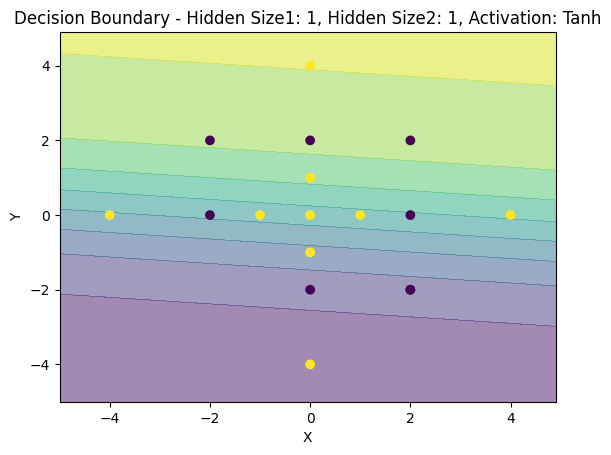

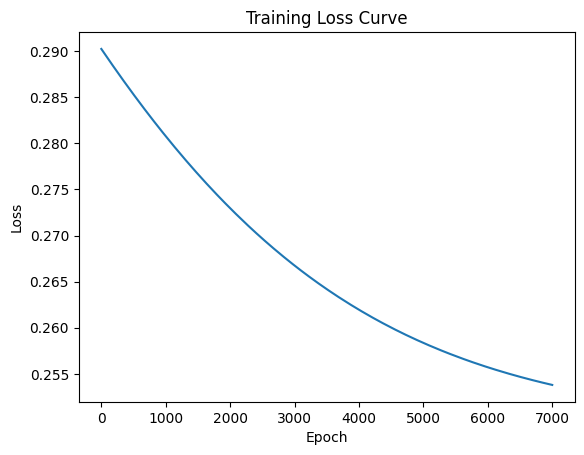

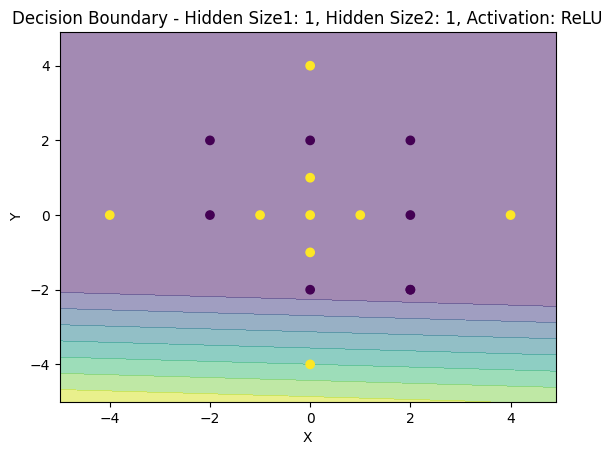

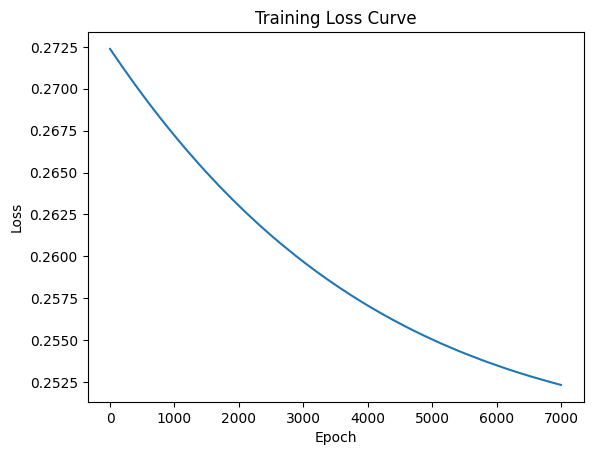

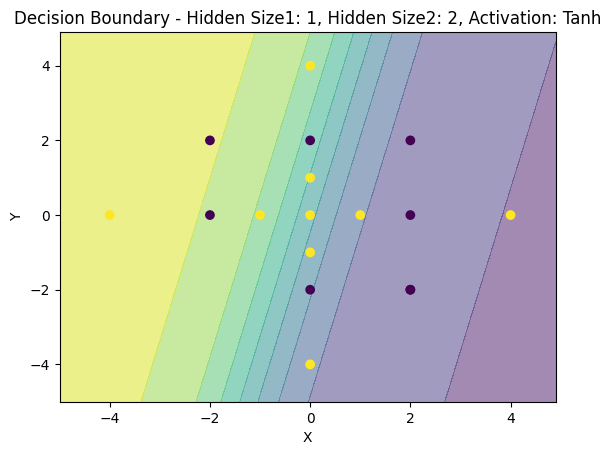

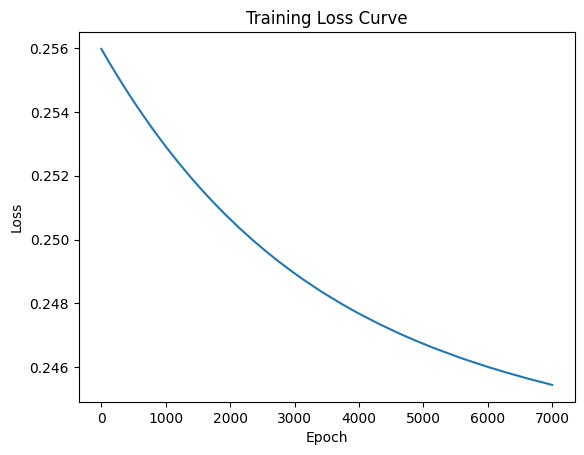

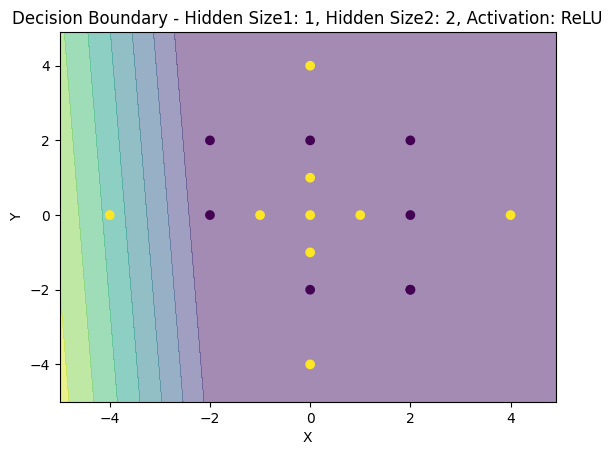

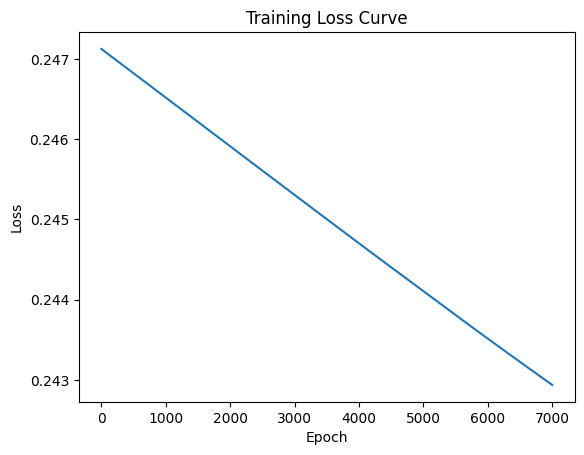

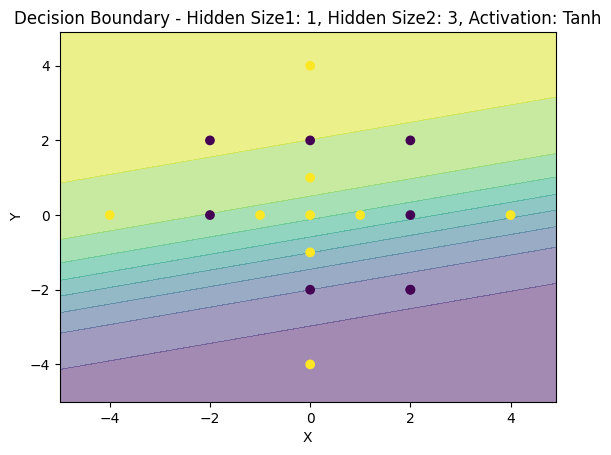

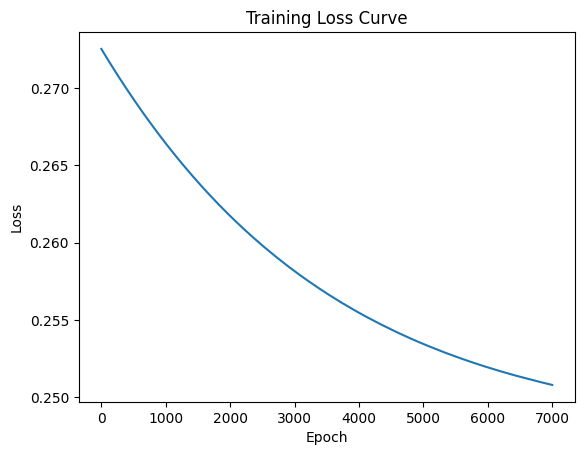

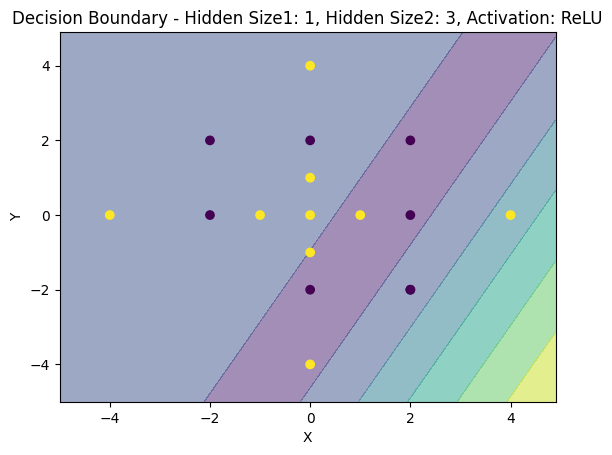

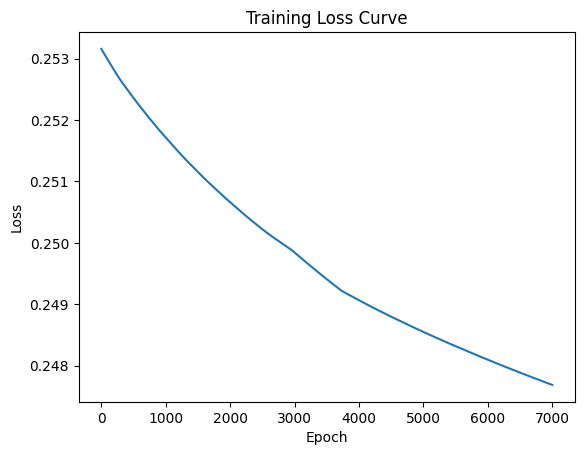

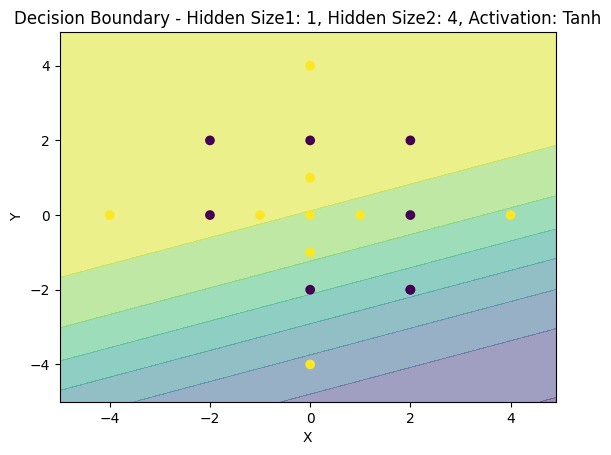

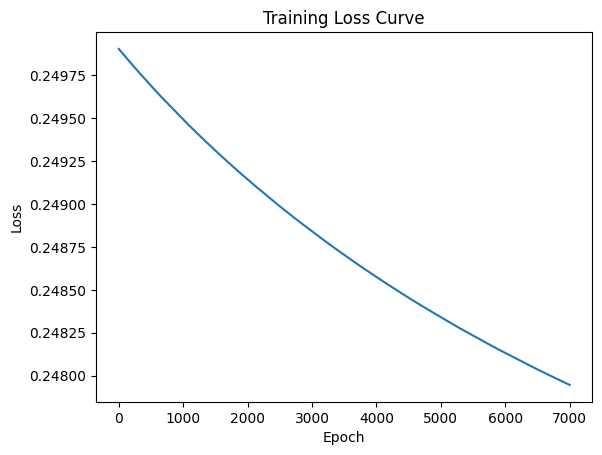

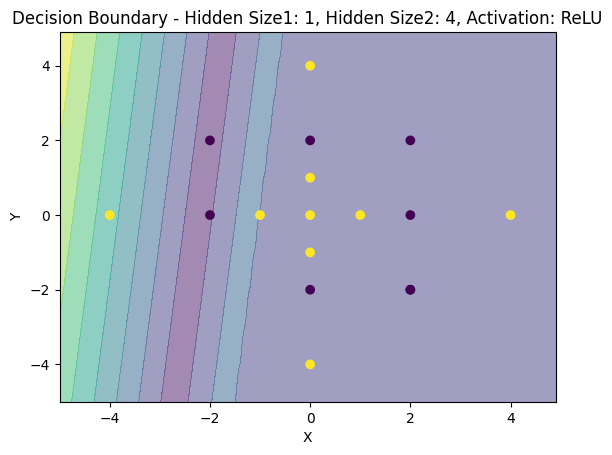

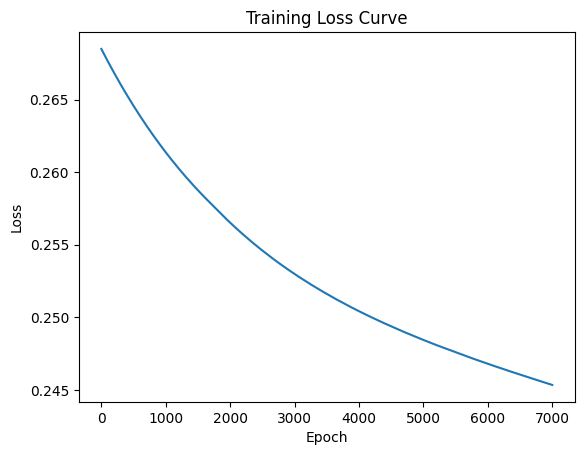

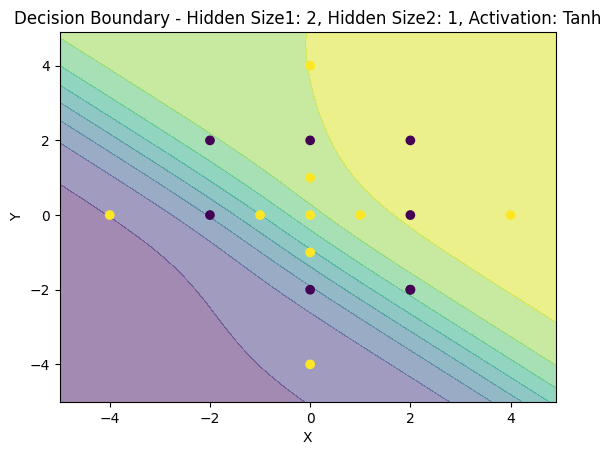

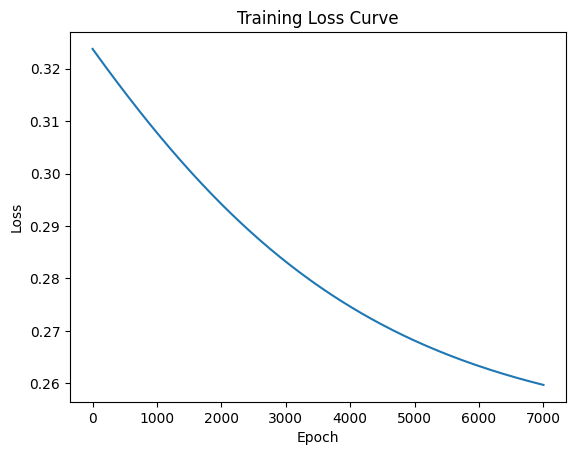

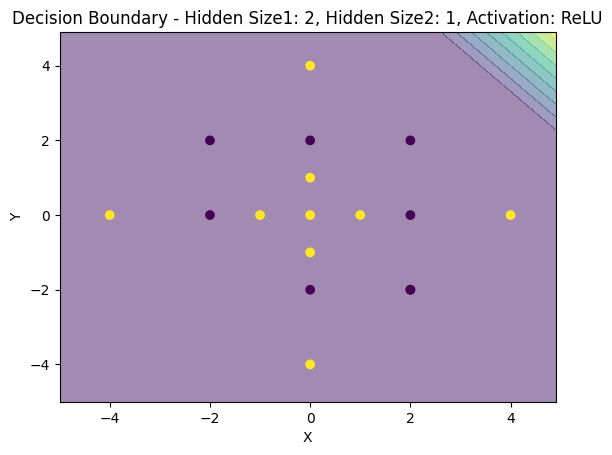

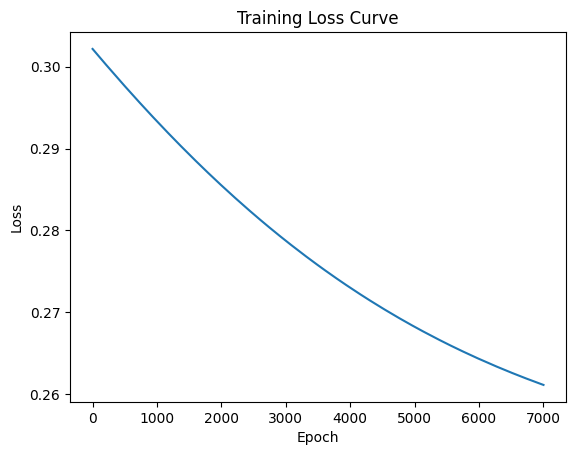

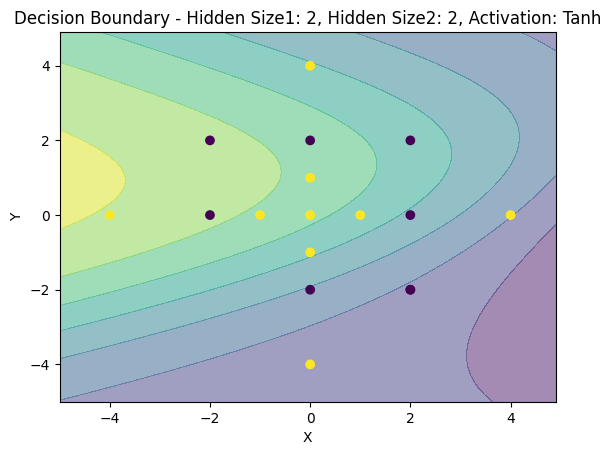

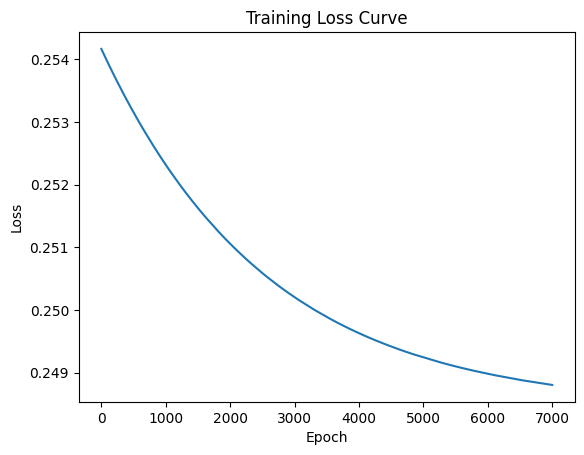

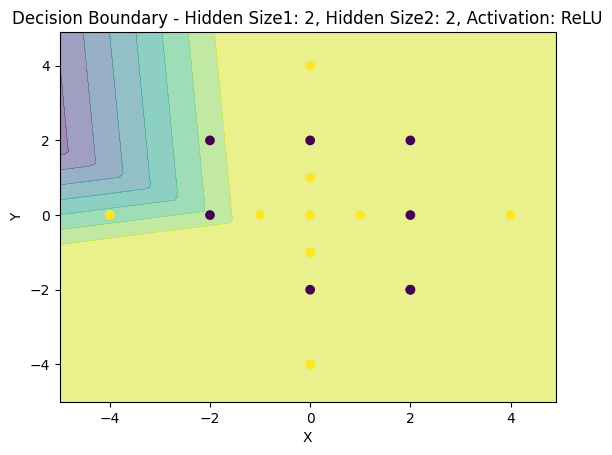

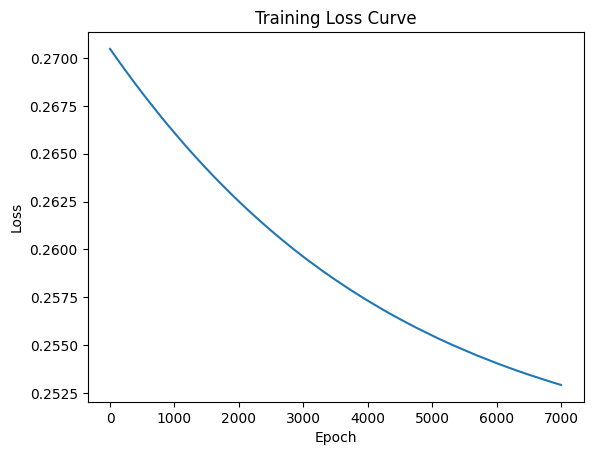

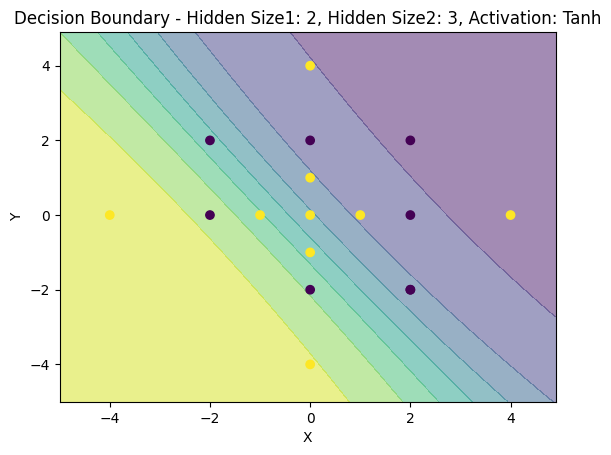

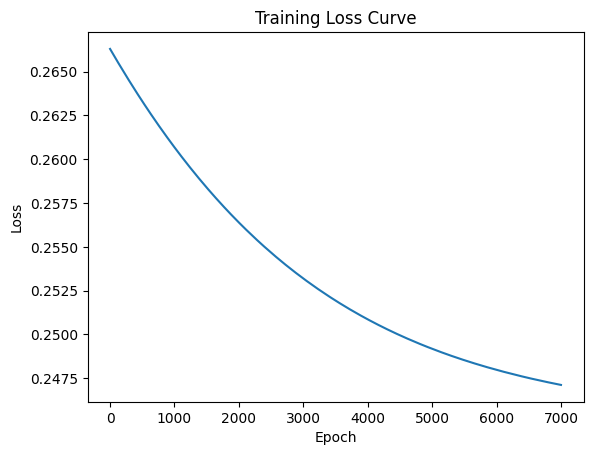

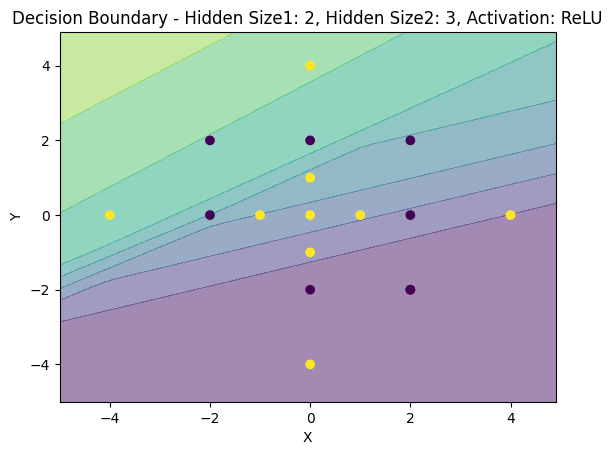

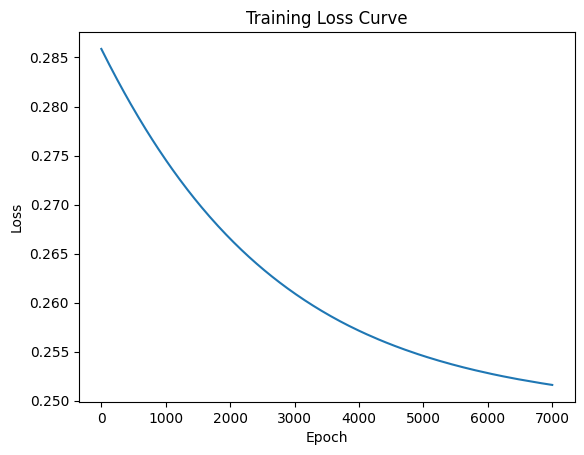

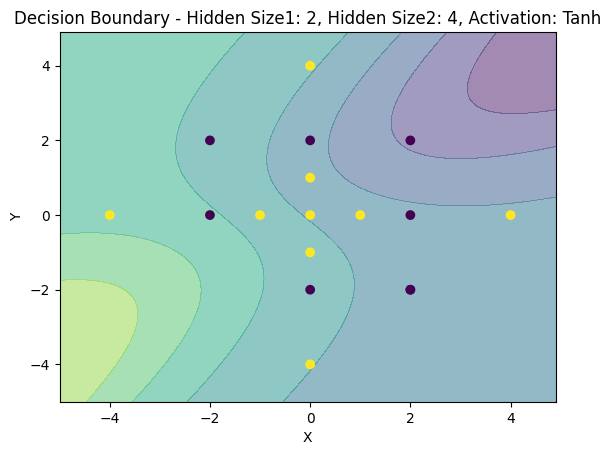

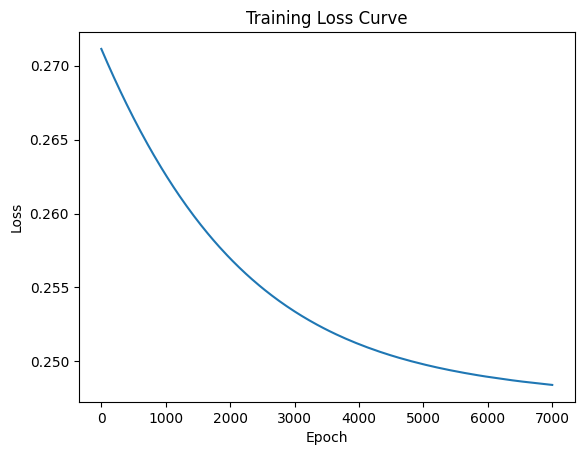

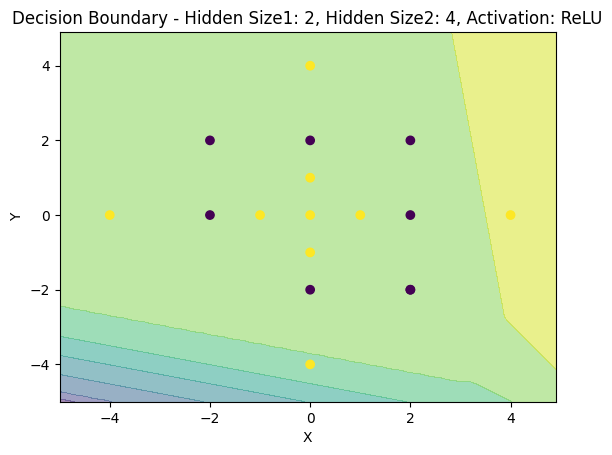

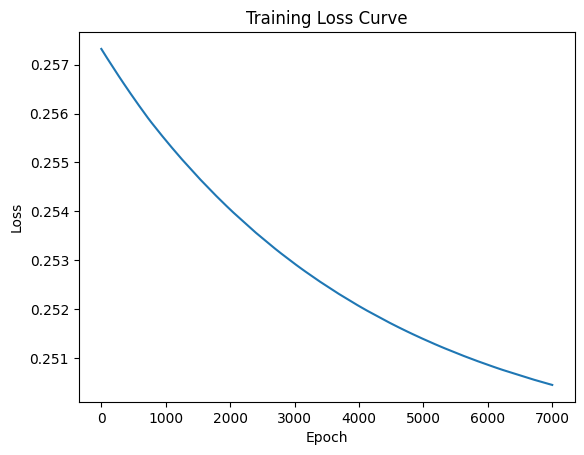

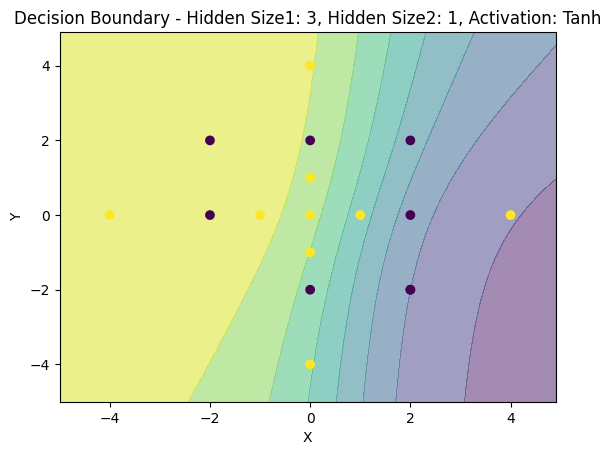

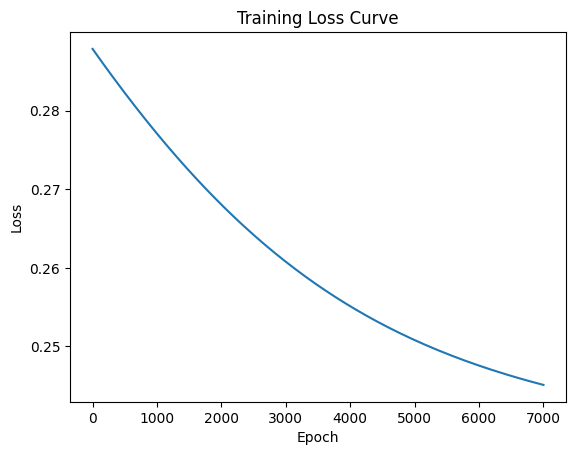

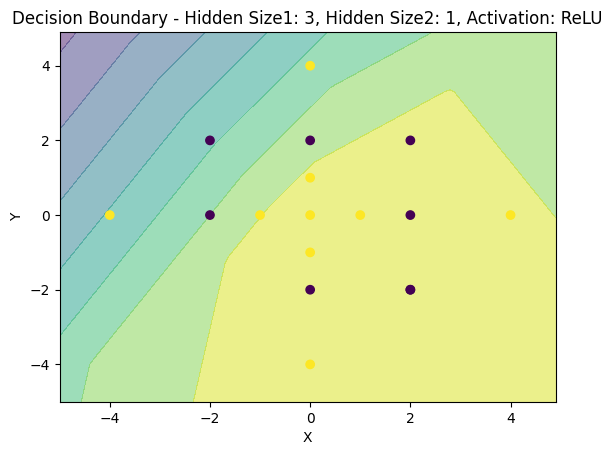

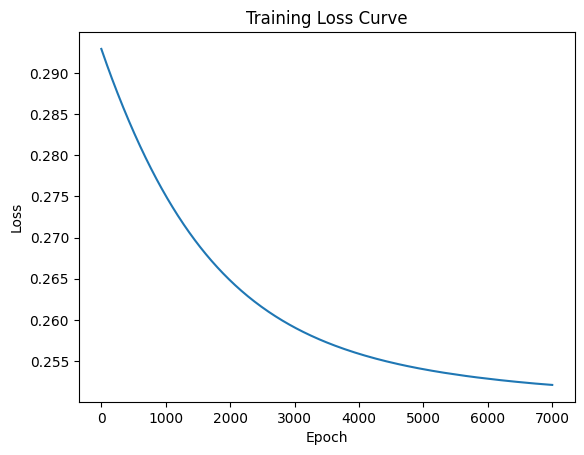

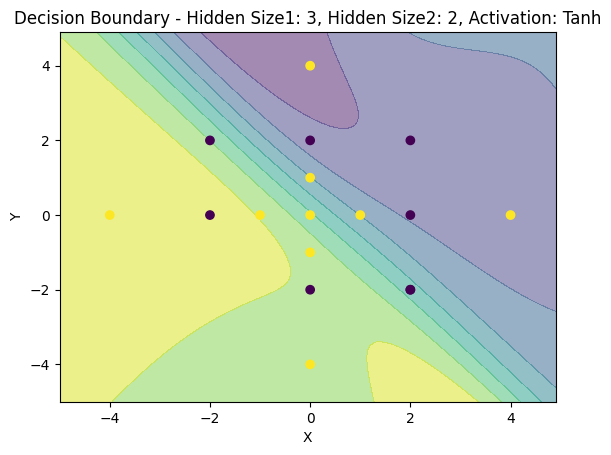

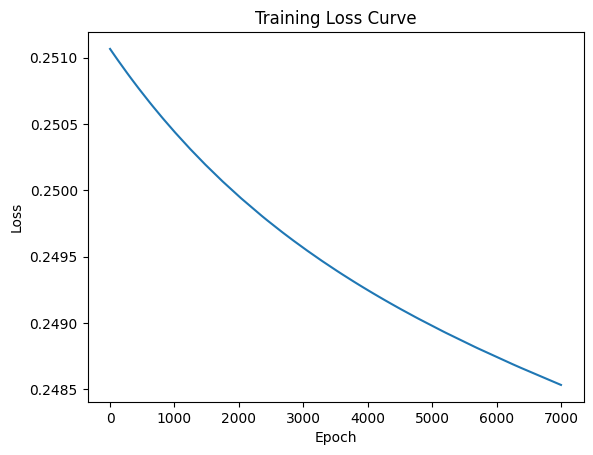

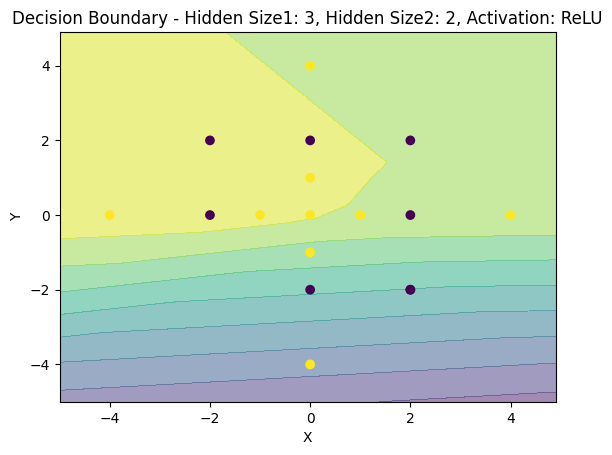

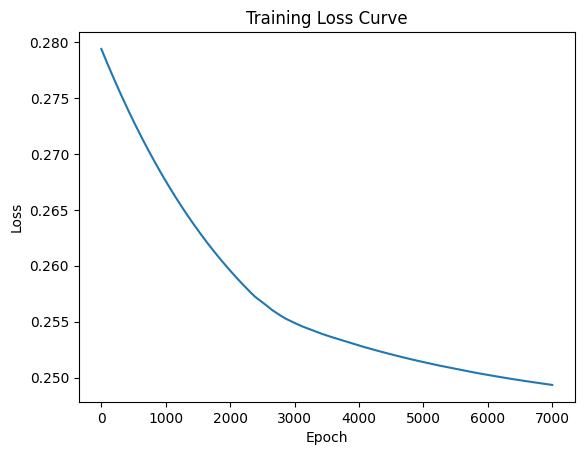

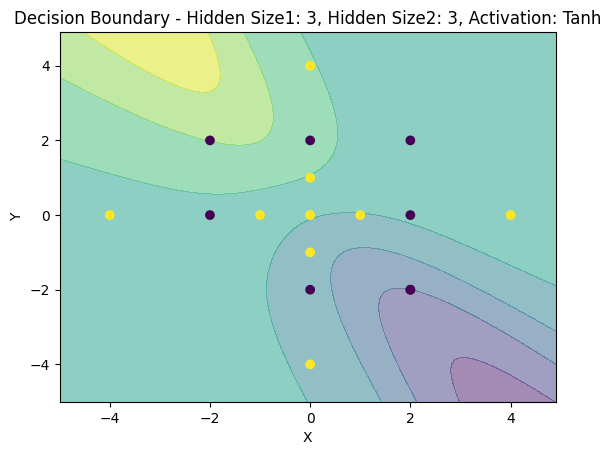

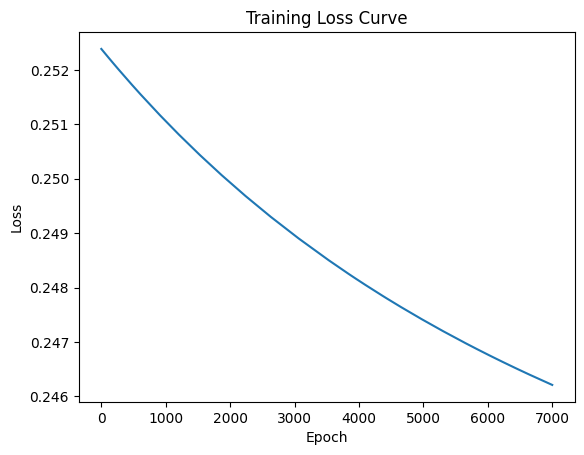

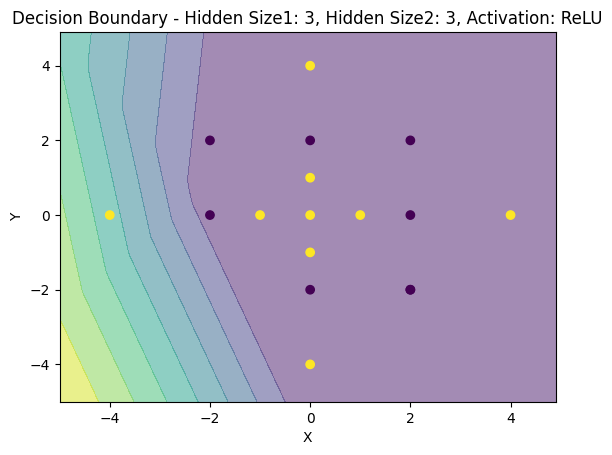

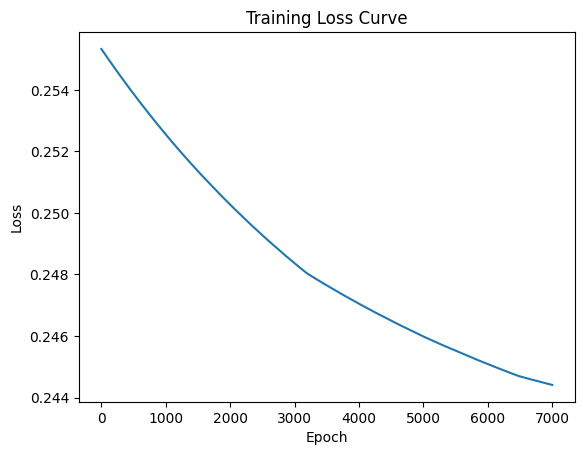

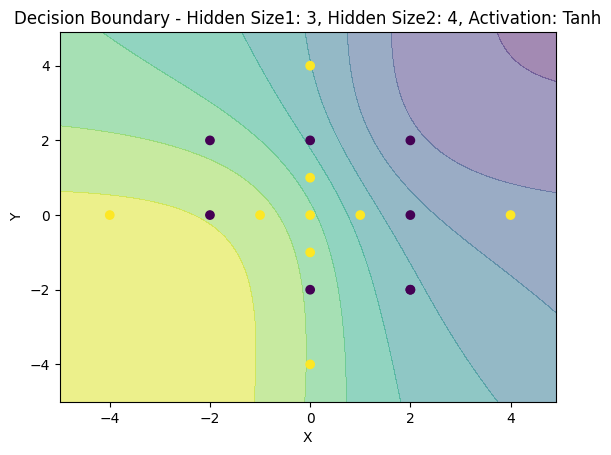

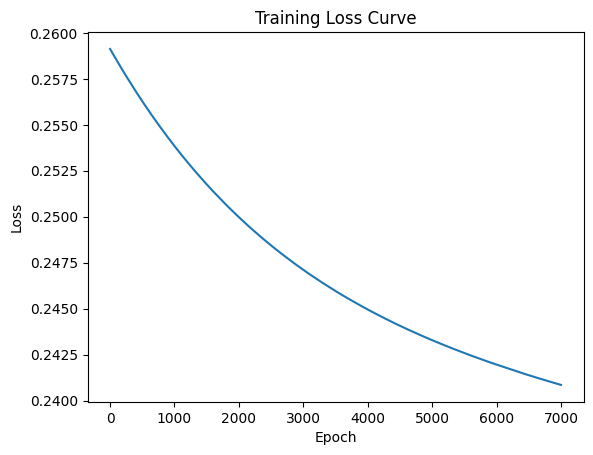

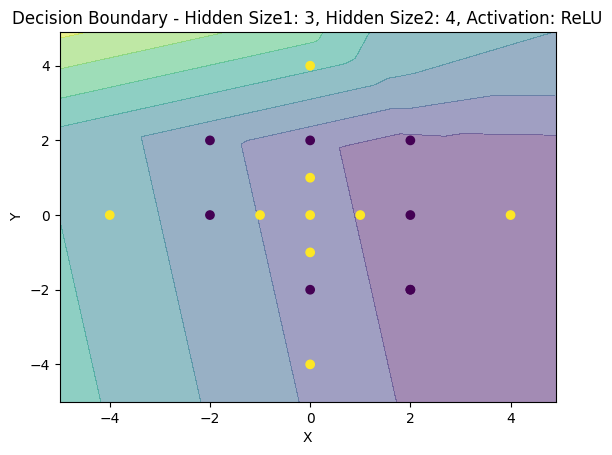

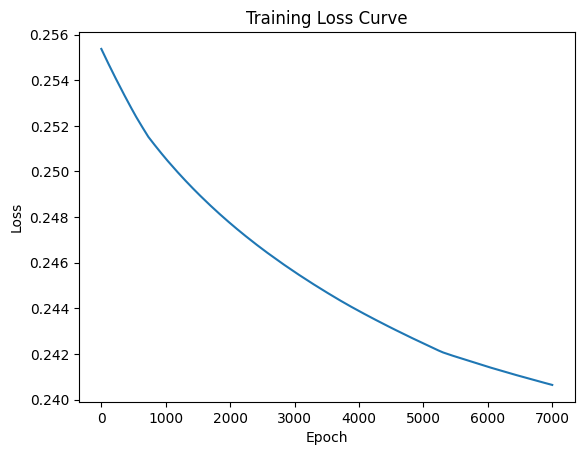

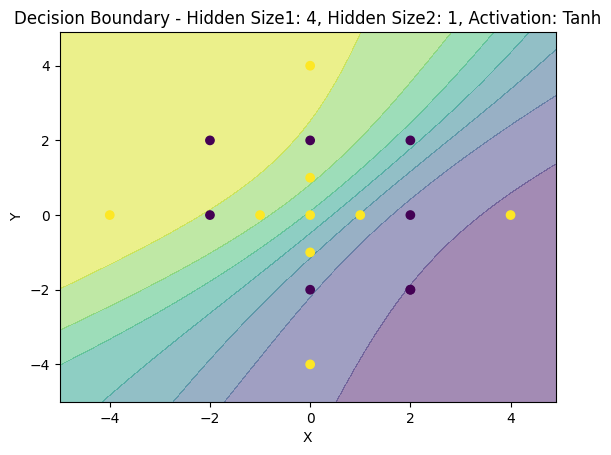

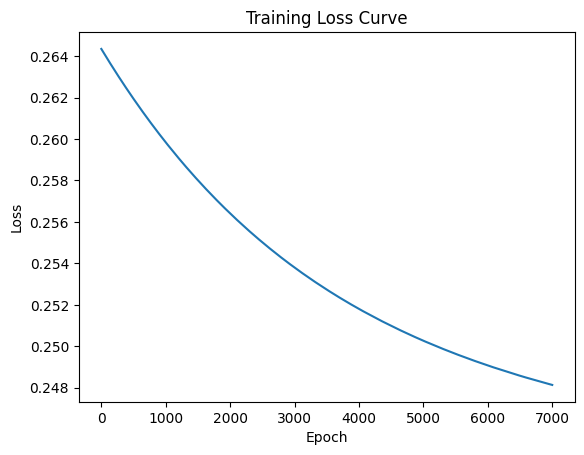

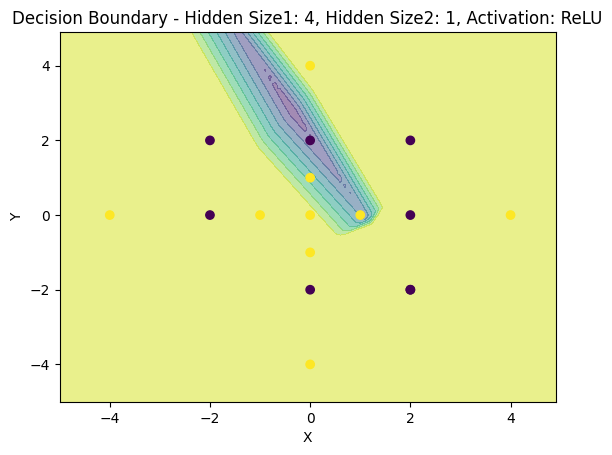

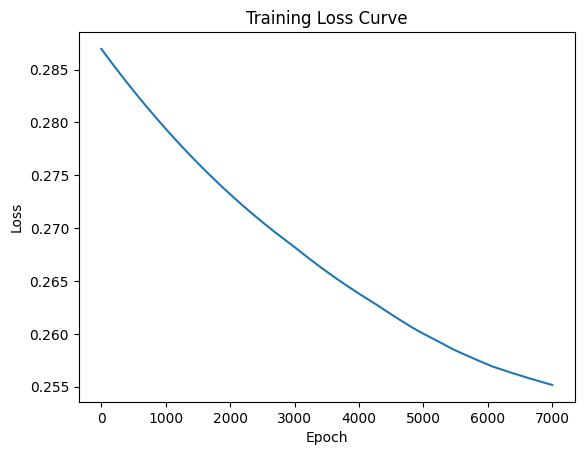

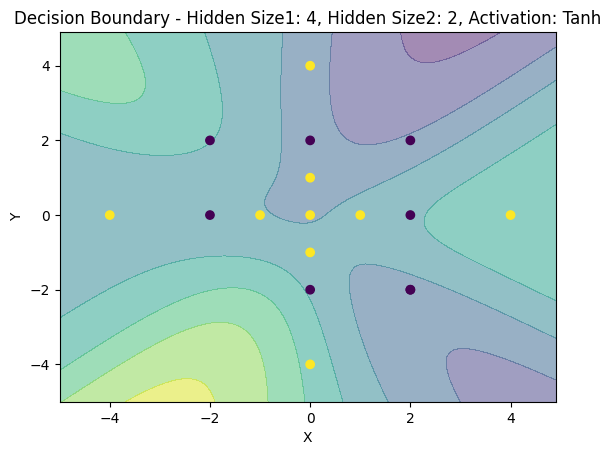

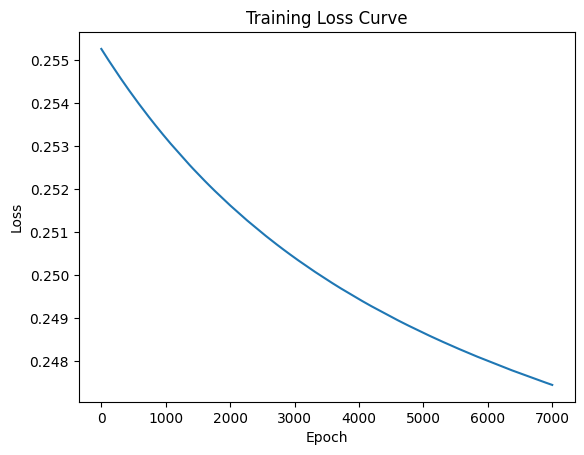

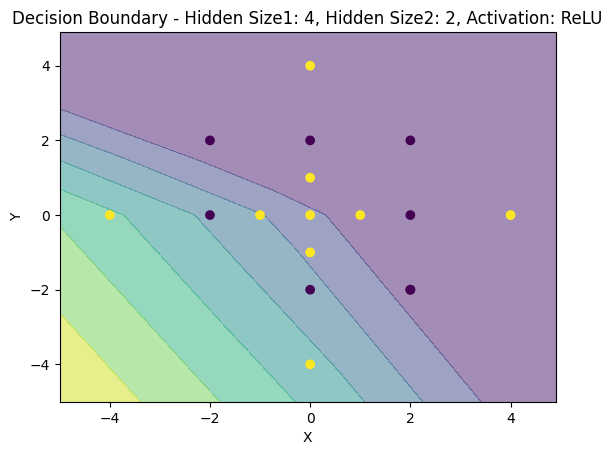

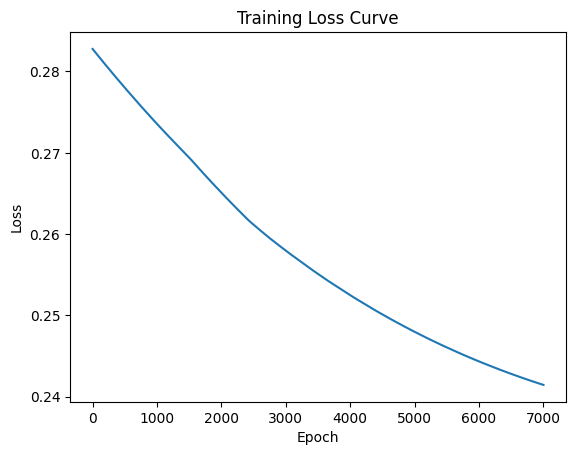

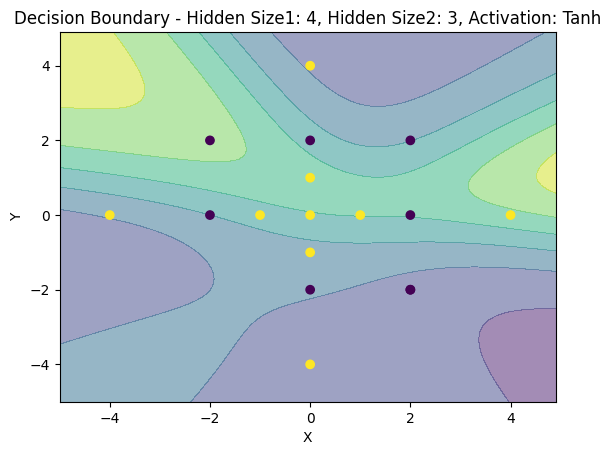

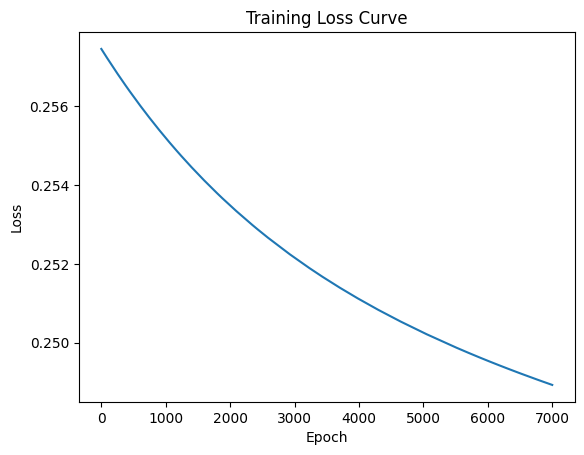

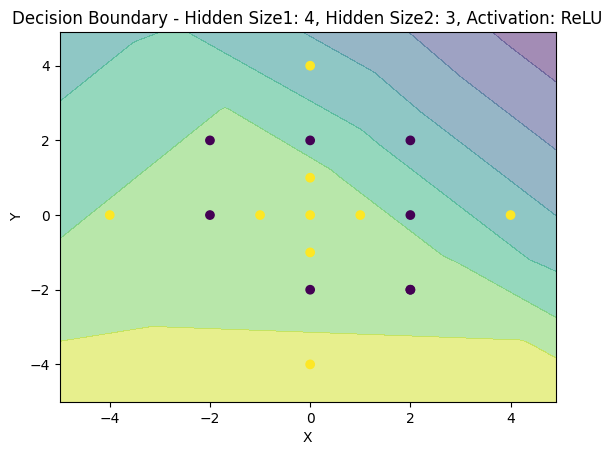

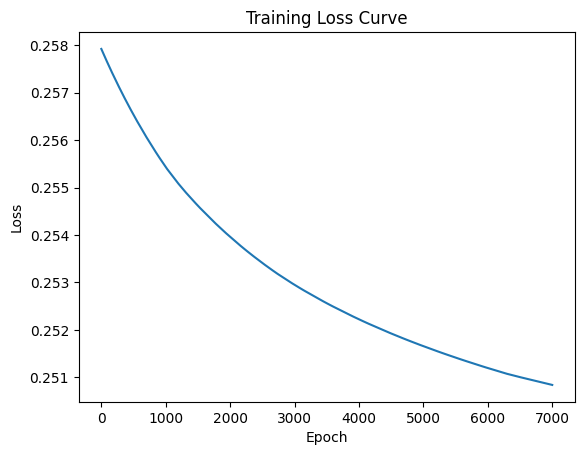

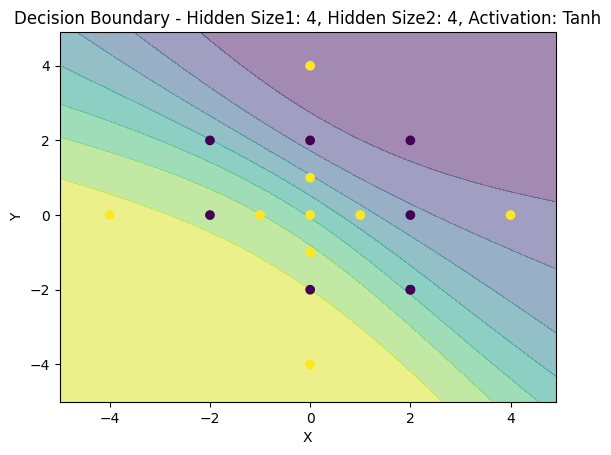

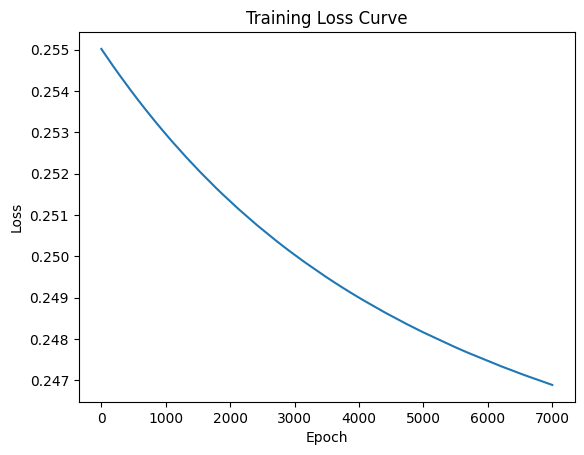

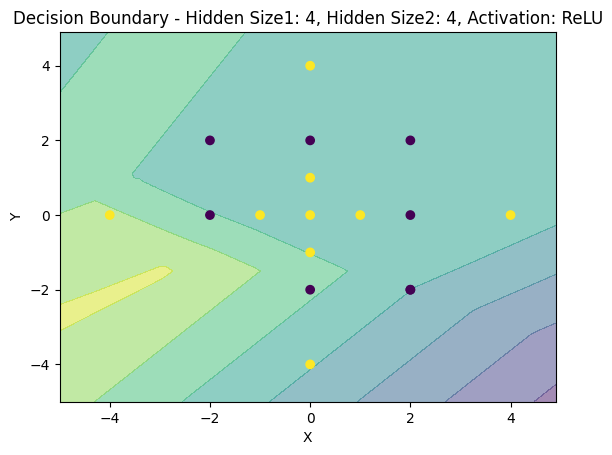

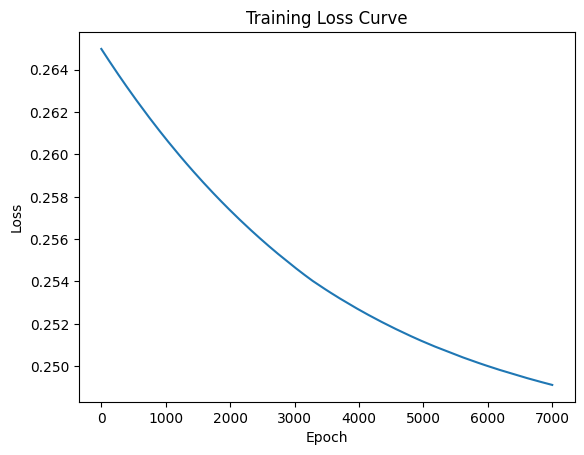

In [11]:
# import libraries
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# training data
X_train = torch.tensor([[1, 0], [-1, 0], [0, 1], [0, -1], [2, 0], [-2, 0], [0, 2], [0, -2], [0, 0], [2, 2], [2, -2], [-2, 2], [2, -2], [4, 0], [-4, 0], [0, 4], [0, -4]], dtype=torch.float32)
y_train = torch.tensor([[1], [1], [1], [1], [0], [0], [0], [0], [1], [0], [0], [0], [0], [1], [1], [1], [1]], dtype=torch.float32)

# define NeuralNetwork
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, activation):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, 1)
        self.activation = activation

    def forward(self, x):
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        x = self.activation(x)
        x = self.fc3(x)
        return torch.sigmoid(x)

# define function to plot_decision_boundary
def plot_decision_boundary(X, y, model, title):
    X = X.numpy()
    y = y.numpy()

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)).detach().numpy()
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='viridis')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

# hidden sizes and activation functions
hidden_sizes = [1, 2, 3, 4]
activations = [nn.Tanh(), nn.ReLU()]

# model training
for hidden_size1 in hidden_sizes:
    for hidden_size2 in hidden_sizes:
        for activation in activations:
            model = NeuralNetwork(input_size=2, hidden_size1=hidden_size1, hidden_size2=hidden_size2, activation=activation)
            criterion = nn.MSELoss() # mse loss
            optimizer = optim.SGD(model.parameters(), lr=0.001) # Stochastic Gradient Descent learning rate = 0.001
            losses = []

            for epoch in range(7000):
                optimizer.zero_grad()
                outputs = model(X_train)
                loss = criterion(outputs, y_train)
                loss.backward()
                optimizer.step()
                losses.append(loss.item())

            plot_decision_boundary(X_train, y_train, model, f'Decision Boundary - Hidden Size1: {hidden_size1}, Hidden Size2: {hidden_size2}, Activation: {activation.__class__.__name__}')

            plt.plot(range(1, len(losses) + 1), losses)
            plt.title('Training Loss Curve')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.show()


we see that if hidden size is equal or greater than 2 the boundries will be more nonlinear

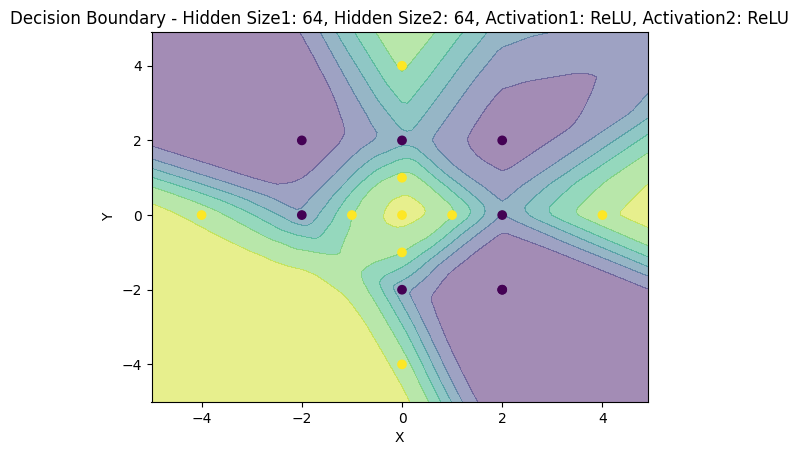

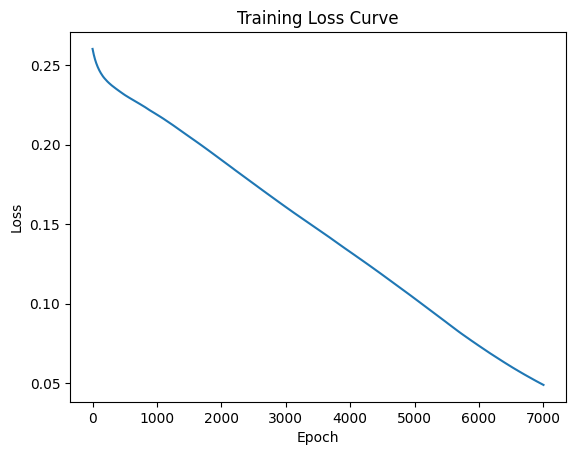

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# training data
X_train = torch.tensor([[1, 0], [-1, 0], [0, 1], [0, -1], [2, 0], [-2, 0], [0, 2], [0, -2], [0, 0], [2, 2], [2, -2], [-2, 2], [2, -2], [4, 0], [-4, 0], [0, 4], [0, -4]], dtype=torch.float32)
y_train = torch.tensor([[1], [1], [1], [1], [0], [0], [0], [0], [1], [0], [0], [0], [0], [1], [1], [1], [1]], dtype=torch.float32)

# define NeuralNetwork
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, activation):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, 1)
        self.activation = activation

    def forward(self, x):
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        x = self.activation(x)
        x = self.fc3(x)
        return torch.sigmoid(x)

# define function to plot_decision_boundary
def plot_decision_boundary(X, y, model, title):
    X = X.numpy()
    y = y.numpy()

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)).detach().numpy()
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='viridis')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

# define NeuralNetwork parameters
input_size = 2
hidden_size1 = 64
hidden_size2 = 64
activation1 = nn.ReLU()
activation2 = nn.ReLU()

# create and train the model
model = NeuralNetwork(input_size, hidden_size1, hidden_size2, activation1)
criterion = nn.MSELoss() # MSE Loss
optimizer = optim.SGD(model.parameters(), lr=0.01) # SGD optimizer with lr=0.01
losses = []

for epoch in range(7000):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())


# plot the decision boundary
plot_decision_boundary(X_train, y_train, model, f'Decision Boundary - Hidden Size1: {hidden_size1}, Hidden Size2: {hidden_size2}, Activation1: {activation1.__class__.__name__}, Activation2: {activation2.__class__.__name__}')

plt.plot(range(1, len(losses) + 1), losses)
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# save model
torch.save(model.state_dict(), 'model_q1_c2.pth')

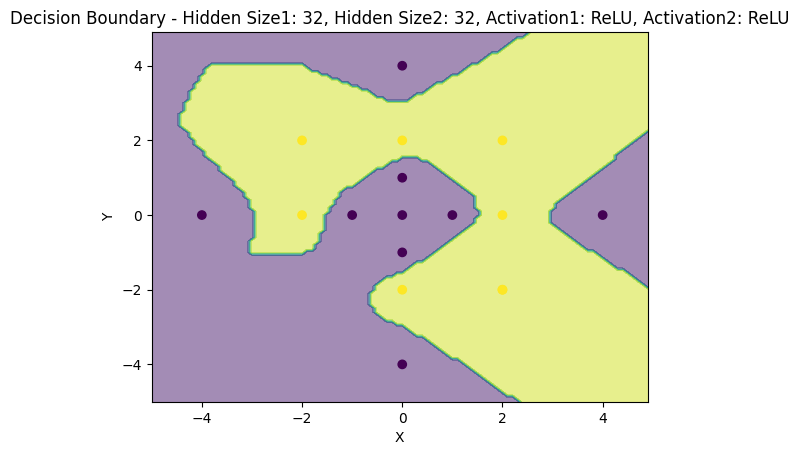

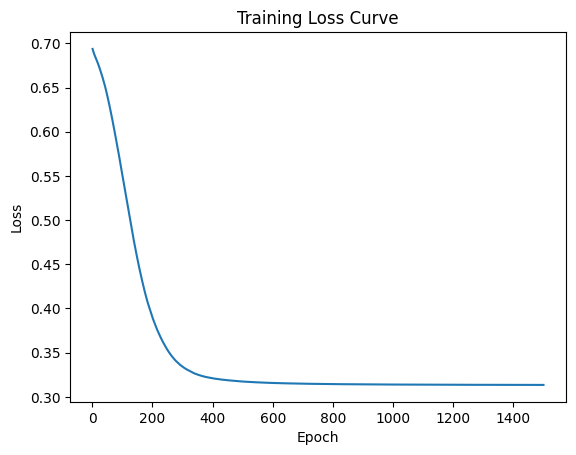

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Training data
X_train = torch.tensor([[1, 0], [-1, 0], [0, 1], [0, -1], [2, 0], [-2, 0], [0, 2], [0, -2], [0, 0], [2, 2], [2, -2], [-2, 2], [2, -2], [4, 0], [-4, 0], [0, 4], [0, -4]], dtype=torch.float32)
y_train = torch.tensor([0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0], dtype=torch.long)  # 0 for class 0, 1 for class 1

# Define NeuralNetwork
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, activation):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, 2)  # 2 output classes
        self.activation = activation

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return torch.softmax(x, dim=1)  # Apply softmax for multiclass classification

# Define function to plot_decision_boundary
def plot_decision_boundary(X, y, model, title):
    X = X.numpy()
    y = y.numpy()

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)).detach().numpy()
    Z = np.argmax(Z, axis=1)  # Convert probabilities to class labels
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='viridis')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

# Define NeuralNetwork parameters
input_size = 2
hidden_size1 = 32
hidden_size2 = 32
activation1 = nn.ReLU()
activation2 = nn.ReLU()  # activation functions

# Create and train the model
model = NeuralNetwork(input_size, hidden_size1, hidden_size2, activation1)
criterion = nn.CrossEntropyLoss()  # Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with lr=0.001
losses = []

for epoch in range(1500):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

# Plot the decision boundary
plot_decision_boundary(X_train, y_train, model, f'Decision Boundary - Hidden Size1: {hidden_size1}, Hidden Size2: {hidden_size2}, Activation1: {activation1.__class__.__name__}, Activation2: {activation2.__class__.__name__}')

plt.plot(range(1, len(losses) + 1), losses)
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# save model
torch.save(model.state_dict(), 'model_q1_c3.pth')